In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_parquet(os.path.join('data','jizdenky.parquet'))

In [3]:
df = df[df['prodejce'] == 'ČD']

In [4]:
df.groupby(["odkud","kam"]).size().nlargest(100)

C:\Users\micha\AppData\Local\Temp\ipykernel_29268\1369194939.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["odkud","kam"]).size().nlargest(100)


odkud                             kam                      
Praha hl.n.                       Brno hl.n.                   54768
Brno hl.n.                        Praha hl.n.                  52916
Praha hl.n.                       Ostrava hl.n.                31799
Ostrava hl.n.                     Praha hl.n.                  25805
Praha hl.n.                       Bratislava hl.st.            10358
                                  Wien Hbf                      9753
Brno hl.n.                        Hamburg Hbf                   8797
Praha hl.n.                       Warszawa Centralna            8636
                                  Bruxelles-Midi                7980
Berlin Hbf (tief)                 Praha hl.n.                   7735
Bratislava hl.st.                 Praha hl.n.                   7687
Praha hl.n.                       Budapest-Nyugati pu           7149
                                  Berlin Hbf (tief)             7118
Ústí n.L.hl.n.                    Dresden H

In [5]:
def filtr(dopravce, mesto1, mesto2):
    dfc = df.copy()
    dfc = dfc[dfc['prodejce'] == dopravce]
    dfc = dfc[dfc['odkud'].str.contains(mesto1) | dfc['kam'].str.contains(mesto1)]
    dfc = dfc[dfc['odkud'].str.contains(mesto2) | dfc['kam'].str.contains(mesto2)]
    minimum_prestupu = dfc['prestupy'].min()
    if minimum_prestupu == -1:
        minimum_prestupu = 0
    print(f"Nejmenší počet přestupů: {minimum_prestupu}.")
    minimum_casu = dfc['jizdni_doba'].min()
    print(f"Nejrychlejší jízdní doba: {minimum_casu} min.")
    dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]
    dfc = dfc.drop_duplicates(subset=['odjezd','kam','predstih_d'], keep='last')
    return dfc.reset_index(drop=True)

Nejmenší počet přestupů: 0.
Nejrychlejší jízdní doba: 145.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_29268\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


<Axes: xlabel='predstih_d', ylabel='cena'>

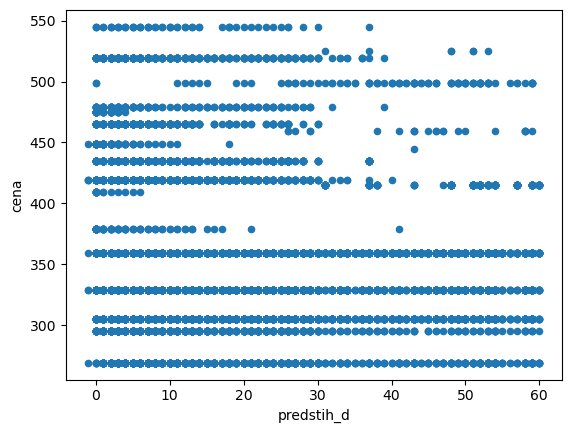

In [6]:
filtr('ČD','Praha','Brn').groupby('predstih_d')['cena'].agg(list).reset_index().explode('cena').plot.scatter(x="predstih_d",y="cena")

Nejmenší počet přestupů: 0.
Nejrychlejší jízdní doba: 112.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_29268\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


<Axes: xlabel='predstih_d', ylabel='cena'>

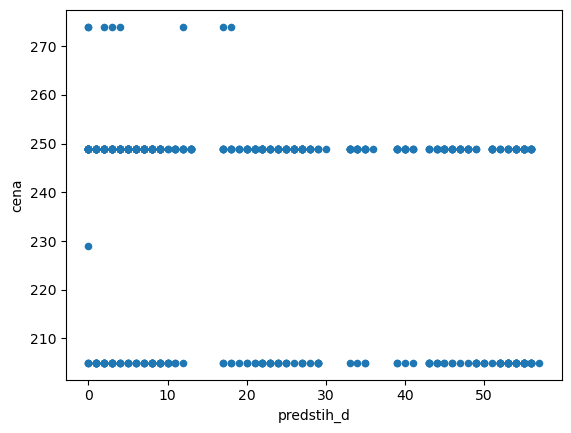

In [7]:
filtr('ČD','České Bu','Plze').groupby('predstih_d')['cena'].agg(list).reset_index().explode('cena').plot.scatter(x="predstih_d",y="cena")

In [8]:
cbpl = filtr('ČD','České Bu','Plze')
cbpl['cena'].drop_duplicates().sort_values()

Nejmenší počet přestupů: 0.
Nejrychlejší jízdní doba: 112.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_29268\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


2      205.0
176    229.0
0      249.0
8      274.0
Name: cena, dtype: float64

Nejmenší počet přestupů: 0.
Nejrychlejší jízdní doba: 112.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_29268\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


<Axes: xlabel='predstih_d'>

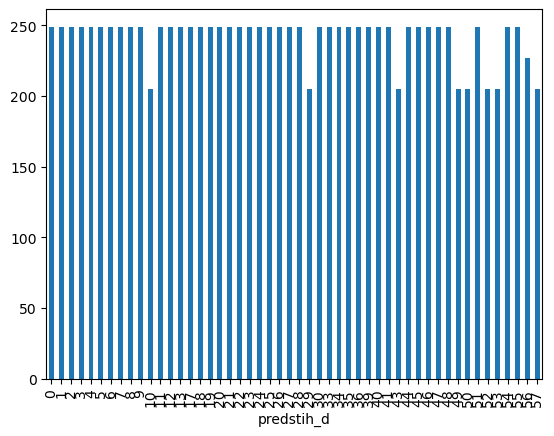

In [33]:
filtr('ČD','České Bu','Plze').groupby('predstih_d')['cena'].median().plot.bar()

Nejmenší počet přestupů: 0.
Nejrychlejší jízdní doba: 385.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_29268\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


<Axes: xlabel='predstih_d'>

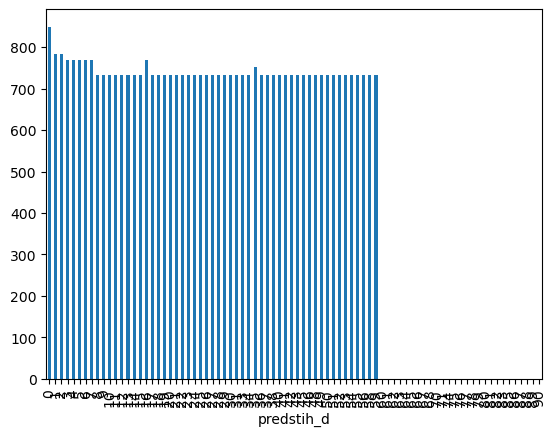

In [31]:
filtr('ČD','Karlovy','Ostrav').groupby('predstih_d')['cena'].median().plot.bar()

Nejmenší počet přestupů: 0.
Nejrychlejší jízdní doba: 385.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_29268\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


<Axes: xlabel='predstih_d', ylabel='cena'>

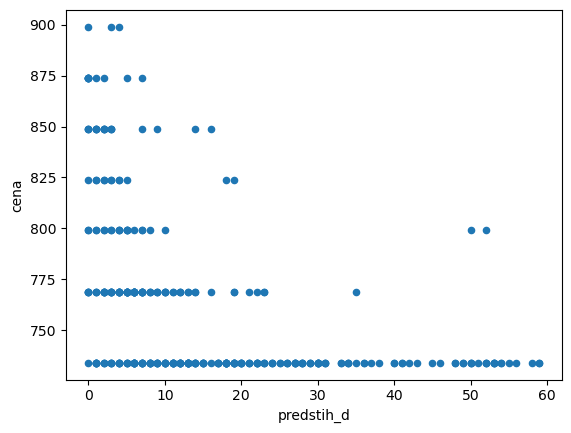

In [9]:
filtr('ČD','Karlovy','Ostrav').groupby('predstih_d')['cena'].agg(list).reset_index().explode('cena').plot.scatter(x="predstih_d",y="cena")

In [10]:
ko = filtr('ČD','Karlovy','Ostrav')
ko['cena'].drop_duplicates().sort_values()

Nejmenší počet přestupů: 0.
Nejrychlejší jízdní doba: 385.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_29268\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


0      734.0
8      769.0
4      799.0
9      824.0
6      849.0
87     874.0
325    899.0
16       NaN
Name: cena, dtype: float64

Nejmenší počet přestupů: 1.
Nejrychlejší jízdní doba: 359.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_29268\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


<Axes: xlabel='predstih_d'>

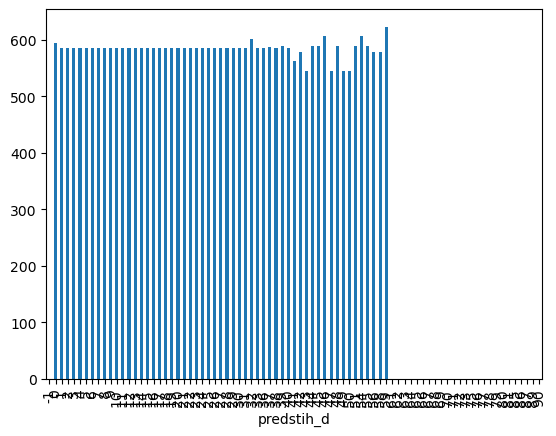

In [27]:
filtr('ČD','Slavoni','Plze').groupby('predstih_d')['cena'].median().plot.bar()

Nejmenší počet přestupů: 1.
Nejrychlejší jízdní doba: 359.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_29268\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


<Axes: xlabel='predstih_d', ylabel='cena'>

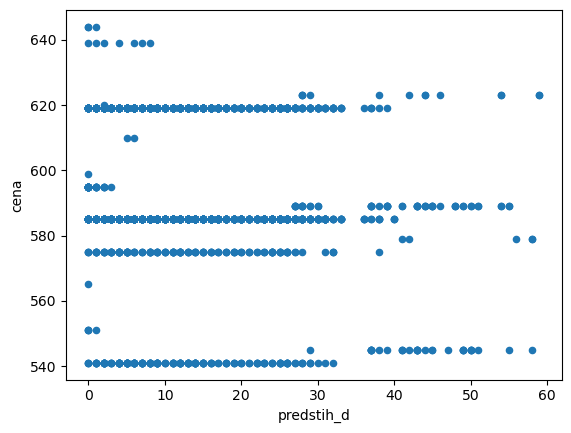

In [11]:
filtr('ČD','Slavoni','Plze').groupby('predstih_d')['cena'].agg(list).reset_index().explode('cena').plot.scatter(x="predstih_d",y="cena")

Nejmenší počet přestupů: 1.
Nejrychlejší jízdní doba: 359.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_29268\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


TypeError: Axes.bar() missing 2 required positional arguments: 'x' and 'height'

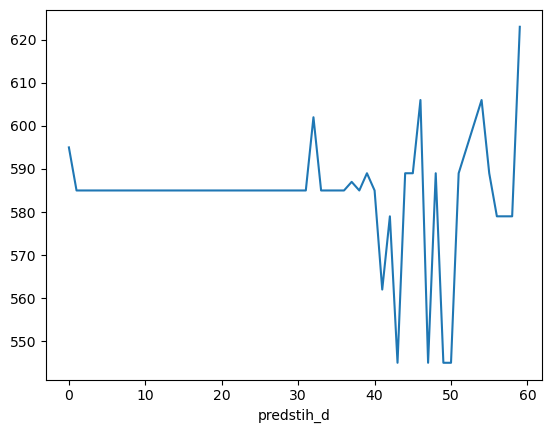

In [29]:
filtr('ČD','Slavoni','Plze').groupby("predstih_d")['cena'].median().plot().bar()

In [12]:
slapl = filtr('ČD','Slavoni','Plze')
slapl['cena'].drop_duplicates().sort_values()

Nejmenší počet přestupů: 1.
Nejrychlejší jízdní doba: 359.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_29268\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


0       541.0
139     545.0
77      551.0
1426    565.0
28      575.0
140     579.0
4       585.0
52      589.0
83      595.0
76      599.0
817     610.0
2       619.0
1233    620.0
53      623.0
807     639.0
808     644.0
14        NaN
Name: cena, dtype: float64

Nejmenší počet přestupů: 0.
Nejrychlejší jízdní doba: 145.0 min.


C:\Users\micha\AppData\Local\Temp\ipykernel_29268\134202732.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[(dfc['prestupy'] == minimum_prestupu) & (df['jizdni_doba'] <= (minimum_casu * 1.25))]


<Axes: xlabel='predstih_d', ylabel='cena'>

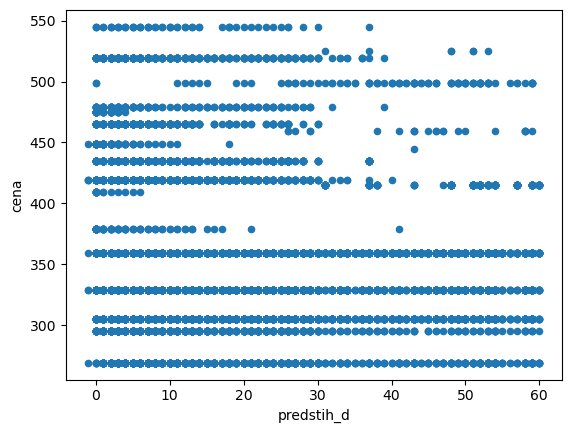

In [13]:
filtr('ČD','Praha','Brn').groupby('predstih_d')['cena'].agg(list).reset_index().explode('cena').plot.scatter(x="predstih_d",y="cena")